<a href="https://colab.research.google.com/github/divya374r1/Neural-Network-and-Deep-Learning/blob/main/Digit_Detection_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training the model...

Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 52s 30ms/step - accuracy: 0.9110 - loss: 0.3034 - val_accuracy: 0.9857 - val_loss: 0.0478
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 48s 29ms/step - accuracy: 0.9865 - loss: 0.0466 - val_accuracy: 0.9875 - val_loss: 0.0372
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 81s 28ms/step - accuracy: 0.9908 - loss: 0.0291 - val_accuracy: 0.9863 - val_loss: 0.0462
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 47s 28ms/step - accuracy: 0.9936 - loss: 0.0192 - val_accuracy: 0.9895 - val_loss: 0.0359
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 82s 28ms/step - accuracy: 0.9957 - loss: 0.0142 - val_accuracy: 0.9918 - val_loss: 0.0368

Evaluating on test data...
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9871 - loss: 0.0409

Test Accuracy: 99.01%


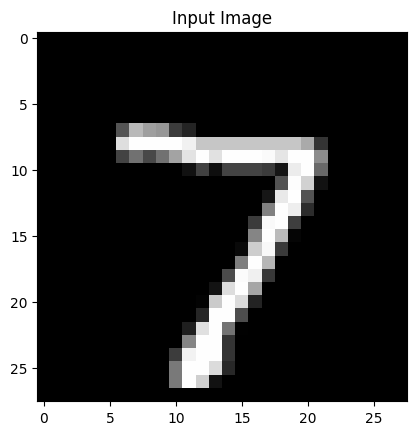

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


Predicted Digit: 7

Model saved as digit_detection_model.h5


In [1]:
# ==========================================================
# DIGIT DETECTION USING TENSORFLOW (MNIST DATASET)
# Full Working Code
# ==========================================================

import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt

# ----------------------------------------------------------
# 1. Load the MNIST dataset
# ----------------------------------------------------------
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# ----------------------------------------------------------
# 2. Preprocess the data
# ----------------------------------------------------------
# Normalize pixel values (0-255 → 0-1)
x_train = x_train / 255.0
x_test = x_test / 255.0

# Reshape for CNN (batch, height, width, channels)
x_train = x_train.reshape((-1, 28, 28, 1))
x_test = x_test.reshape((-1, 28, 28, 1))

# ----------------------------------------------------------
# 3. Build the CNN model
# ----------------------------------------------------------
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 digit classes
])

# ----------------------------------------------------------
# 4. Compile the model
# ----------------------------------------------------------
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# ----------------------------------------------------------
# 5. Train the model
# ----------------------------------------------------------
print("Training the model...\n")
history = model.fit(
    x_train,
    y_train,
    epochs=5,
    validation_split=0.1
)

# ----------------------------------------------------------
# 6. Evaluate on test data
# ----------------------------------------------------------
print("\nEvaluating on test data...")
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"\nTest Accuracy: {test_acc * 100:.2f}%")

# ----------------------------------------------------------
# 7. Predict a single digit from test set
# ----------------------------------------------------------
index = 0  # change to test different samples
img = x_test[index]

plt.imshow(img.reshape(28, 28), cmap="gray")
plt.title("Input Image")
plt.show()

prediction = model.predict(np.array([img]))
predicted_digit = np.argmax(prediction)

print("Predicted Digit:", predicted_digit)

# ----------------------------------------------------------
# 8. Save the model
# ----------------------------------------------------------
model.save("digit_detection_model.h5")
print("\nModel saved as digit_detection_model.h5")